<a href="https://colab.research.google.com/github/Dhananjay15/THE_SPARKS_FOUNDATION_TASKS/blob/main/TSF_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME: DHANANJAY DUBEY**

# **OBJECTIVE: Create the Decision Tree classifier and visualize it graphically.**

In [ ]:
#importing required libraraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#loading dataset
dataset = pd.read_csv('/content/drive/MyDrive/UCI datasets/Copy of Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# removing id feature
dataset.drop('Id',axis=1,inplace=True)

In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


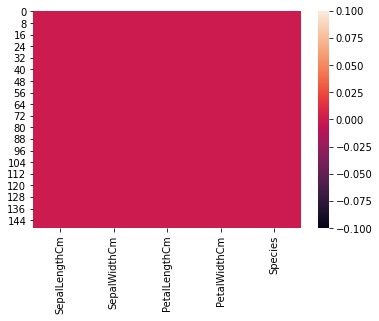

In [ ]:
#checking for null values
sns.heatmap(dataset.isnull())

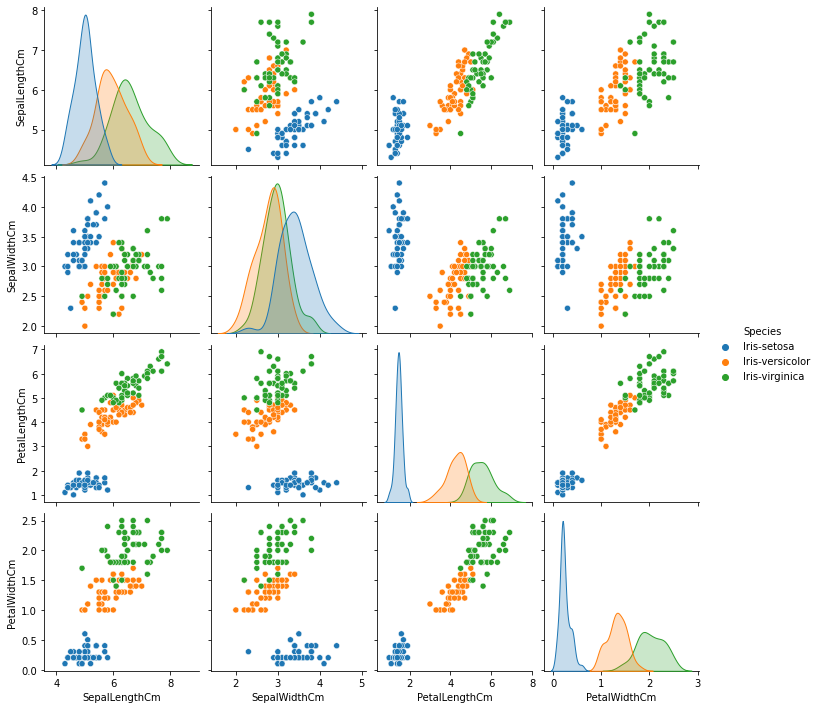

In [ ]:
#visualising the dataset
sns.pairplot(dataset,hue='Species')

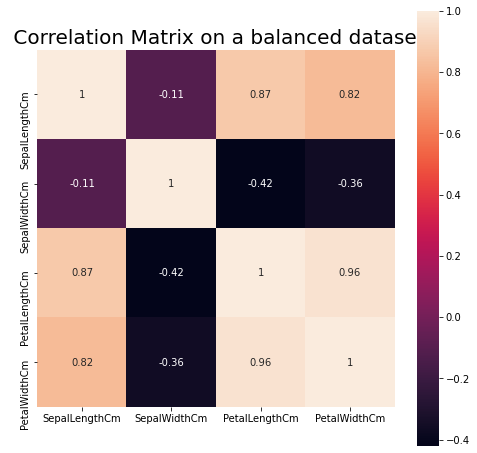

In [ ]:
#checking correlation
corrmat = dataset.corr() 
fig = plt.figure(figsize = (8, 8)) 
map=sns.heatmap(corrmat, vmax = 1, square = True,annot=True) 
map.set_title(' Correlation Matrix on a balanced dataset', fontsize=20)
plt.show()

all features are highly corelated to each other

# **preparing Decision Tree model**

In [ ]:
#selecting dependent and independent variables from dataset
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [ ]:
#encoding dependent variable
le = LabelEncoder()
Y=le.fit_transform(Y)

In [ ]:
#spliting in training_set and test_set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
#training
model=DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=5,random_state=0)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#predicting on test set
pred=model.predict(X_test)

In [ ]:
#accuracy testing
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)
accuracy_score(Y_test, pred)

[[12  0  0]
 [ 0 14  1]
 [ 0  0 18]]


0.9777777777777777

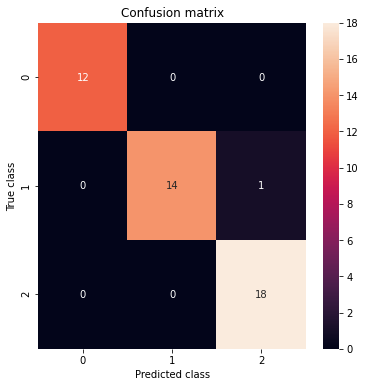

In [ ]:
#visualising confusion matrix
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusion_matrix(Y_test,pred,labels = [0,1,2]),annot = True); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

**Visualising Decision Tree model**

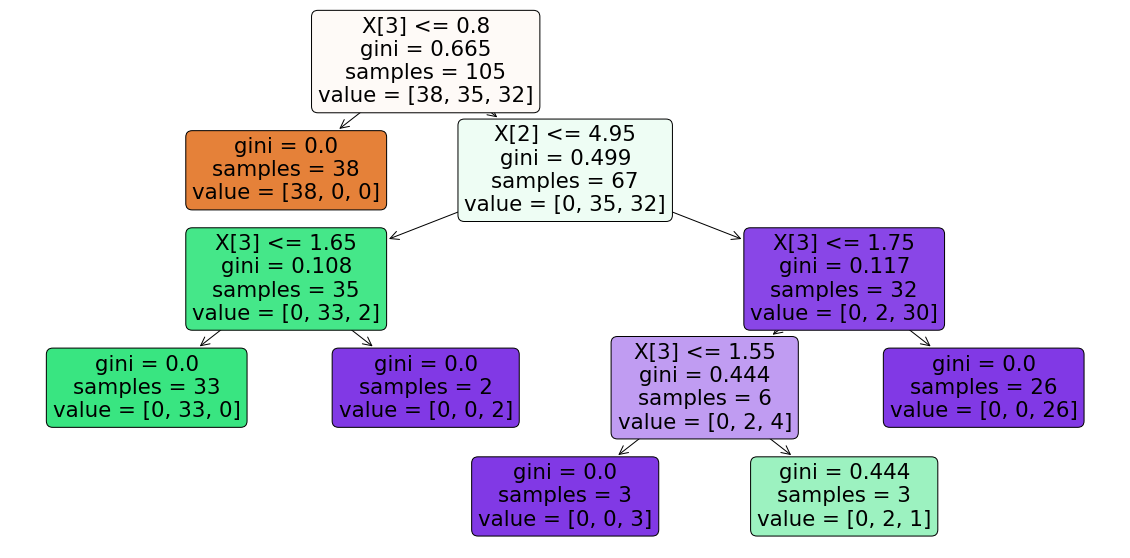

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(model,rounded=True,filled=True)
plt.show()